In [1]:
from selenium import webdriver
import time

In [2]:
# opening window in automated brower.
driver_path = "chromedriver"
brave_path = "C:/Program Files/BraveSoftware/Brave-Browser/Application/brave.exe"

option = webdriver.ChromeOptions()
option.binary_location = brave_path
# option.add_argument("--incognito") OPTIONAL
# option.add_argument("--headless") OPTIONAL

# Create new Instance of Chrome
driver = webdriver.Chrome(executable_path=driver_path, options=option)
driver.get('https://www.instagram.com/?hl=en')

In [3]:
# Passing texts and logging into the instagram account
driver.find_element_by_name('username').send_keys('-------')
driver.find_element_by_name('password').send_keys('-------')
login_btn=driver.find_element_by_xpath('//button[@class="sqdOP  L3NKy   y3zKF     "]')
login_btn.click()

time.sleep(3)

In [4]:
# Taking care of Turn on notifications message.
driver.find_element_by_xpath('//button[@class="aOOlW   HoLwm "]').click()

Search Top Handles of Food

In [5]:
# searching for food and printing instagram handles.
search_bar=driver.find_element_by_xpath('//input[@type="text"]')
search_bar.send_keys('food')
time.sleep(3)

Instagram_Handles=[]
li=driver.find_elements_by_xpath('//a[@class="yCE8d  "]/div/div/div[1]/span')
for i in li:
    Instagram_Handles.append(i.get_attribute('innerHTML'))

In [6]:
for i in Instagram_Handles:
    if i[0]=='#':
        Instagram_Handles.remove(i)
Instagram_Handles=Instagram_Handles[:12]

In [8]:
Instagram_Handles=Instagram_Handles[1:]
Instagram_Handles

['foodtalkindia',
 'buzzfeedfood',
 'dilsefoodie',
 'foodinsider',
 'foodbeast',
 'food52',
 'food',
 'foodandwine',
 'hmm_nikhil',
 'foodnetwork']

Find Total Followers of each Top Handles

In [34]:
# extracting total followers of each handle and storing in a dictionary.
d_followers={}
for i in Instagram_Handles:
    search_bar=driver.find_element_by_xpath('//input[@type="text"]')
    search_bar.send_keys(i)
    time.sleep(2)
    
    if i=='food':
        time.sleep(2)
        driver.find_element_by_xpath('//a[@href="/food/"]').click()
        time.sleep(2)
        d_followers[i]=driver.find_element_by_xpath('//a[@class="-nal3 "]/span').get_attribute('innerHTML')
        time.sleep(1)
    else:
        time.sleep(2)
        driver.find_element_by_xpath('//div[@class="fuqBx"]/a').click()
        time.sleep(2)
        d_followers[i]=driver.find_element_by_xpath('//a[@class="-nal3 "]/span').get_attribute('innerHTML')
        time.sleep(1)
d_followers

{'foodtalkindia': '293k',
 'buzzfeedfood': '3.7m',
 'dilsefoodie': '377k',
 'foodinsider': '2.1m',
 'foodbeast': '1.1m',
 'food52': '2.6m',
 'food': '13.2k',
 'foodandwine': '3.3m',
 'hmm_nikhil': '19.9k',
 'foodnetwork': '10.1m'}

In [10]:
# top 5 instagram handles with respect to number of followers
top_handles=['buzzfeedfood','foodinsider','foodbeast','dilsefoodie','foodtalkindia']

Find Comments of Top Handles

In [36]:
from bs4 import BeautifulSoup
d={}
for i in top_handles:
    d[i]=list()

In [16]:
for i in top_handles:
    search_bar=driver.find_element_by_xpath('//input[@type="text"]')
    search_bar.send_keys(i)
    time.sleep(2)
    driver.find_element_by_xpath('//div[@class="fuqBx"]/a').click()
    time.sleep(3)
    links_posts=driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    time.sleep(2)
    for j in links_posts[:10]:
        j.click()
        time.sleep(3)
        html=driver.find_element_by_xpath('//div[@class="C4VMK"]/span').get_attribute('innerHTML')
        data=BeautifulSoup(html,'html.parser')
        d[i].append(data.get_text())
        driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]').click()
        time.sleep(3)
d

{'buzzfeedfood': ['This place in Seattle serves tide-to-table shellfish! 😱Follow 👉@bringme for more foodie spots around the world!',
  'Are you ready to get bougie on a budget? You can get a Michelin star meal in Paris! 🇫🇷Follow 👉@bringme for more foodie adventures!',
  'This place in Seattle serves tide-to-table shellfish! 😱Follow 👉@bringme for more foodie spots around the world!',
  'Are you ready to get bougie on a budget? You can get a Michelin star meal in Paris! 🇫🇷Follow 👉@bringme for more foodie adventures!',
  "Why aren't you following @bringme yet?! 🍜Follow @bringme for more foodie adventures! 🌍✈️",
  'Brazil makes the cheesiest chili cheeseburgers! 😋🍔Follow @bringme for more!',
  "Move over Italy, Vancouver might have the world's best gelato! 🍨What's your favorite gelato flavor? Follow 👉@bringme for more mouthwatering adventures around the globe! 🌎",
  'Sushi + sustainability = my dream come true! 🍣Follow @bringme for more foodie adventures around the world! ✈️.....#bringme #

Find Word Frequencies

In [17]:
li_words=[]
for i in d.values():
    for j in i:
        j=j.replace('.','')
        j=j.replace('🇫🇷','')
        j=j.replace('?','')
        j=j.replace(',','')
        j=j.replace('+','')
        j=j.replace('=','')
        j=j.replace('"','')
        j=j.replace('!','')
        j=j.replace('-','')
        j=j.replace('@','')
        j=j.replace(':','')
        j=j.replace('🥑','')
        j=j.replace('🍣','')
        j=j.replace('😍🍰','')
        j=j.replace('🍻','')
        j=j.replace('☕️🍫','')
        j=j.replace('✈️','')
        j=j.replace('🍜','')
        j=j.replace('😱','')
        j=j.replace('👉','')
        j=j.replace('😋🍔','')
        j=j.replace('🍨','')
        j=j.replace('🥪','')
        j=j.replace('📸','')
        j=j.replace('🏃\u200d♀️‘','')
        j=j.replace('💻','')
        j=j.replace('👨\u200d👩\u200d👧\u200d👦','')
        for k in j.split():
            li_words.append(k)

In [19]:
# calculating frequency of each word.
freq_words={}
d_words={}
for i in li_words:
    d_words[i]=d_words.get(i,0)+1
d_words

{'This': 14,
 'place': 5,
 'in': 35,
 'Seattle': 3,
 'serves': 5,
 'tidetotable': 3,
 'shellfish': 3,
 'Follow': 22,
 'bringme': 22,
 'for': 48,
 'more': 25,
 'foodie': 16,
 'spots': 3,
 'around': 16,
 'the': 92,
 'world': 10,
 'Are': 3,
 'you': 22,
 'ready': 5,
 'to': 87,
 'get': 11,
 'bougie': 3,
 'on': 32,
 'a': 49,
 'budget': 3,
 'You': 7,
 'can': 17,
 'Michelin': 3,
 'star': 3,
 'meal': 3,
 'Paris': 3,
 'adventures': 15,
 'Why': 6,
 "aren't": 2,
 'following': 2,
 'yet': 3,
 '🌍': 2,
 'Brazil': 2,
 'makes': 2,
 'cheesiest': 2,
 'chili': 2,
 'cheeseburgers': 2,
 'Move': 2,
 'over': 4,
 'Italy': 2,
 'Vancouver': 2,
 'might': 2,
 'have': 11,
 "world's": 2,
 'best': 3,
 'gelato': 4,
 "What's": 2,
 'your': 27,
 'favorite': 6,
 'flavor': 2,
 'mouthwatering': 2,
 'globe': 4,
 '🌎': 2,
 'Sushi': 2,
 'sustainability': 2,
 'my': 3,
 'dream': 3,
 'come': 3,
 'true': 2,
 '#bringme': 2,
 '#portlandtravel': 2,
 '#sushirestuarant': 2,
 '#sushi': 2,
 '#oregontravel': 2,
 '#sustainability': 2,
 'Thes

In [23]:
import pandas as pd
words=list(d_words.keys())
freq=list(d_words.values())
data={'Words':words, 'Frequency':freq}
df=pd.DataFrame(data)
df.to_csv('Frequency.csv',index=False)

Get Most Used Hashtags

In [29]:
# creating a dictionary to get top hashtags with respect to number of times it is used.
d={}
for i in d_words.keys():
    if '#' in i:
        d[i]=d_words[i]

from collections import Counter
k=Counter(d)
li=k.most_common(5)
for i in li:
    print(i[0],i[1])

#FoodInsider 16
#food 12
#foodbeast 11
#FoodNews 6
#easycookingwithdilsefoodie 4


Hastags use percentage

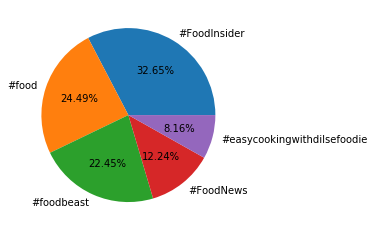

In [32]:
# plotting pie for hastags with percentage times used in scraped posts.
import matplotlib.pyplot as plt
times=[]
tags=[]
for i in li:
    tags.append(i[0])
    times.append(i[1])
plt.pie(times,labels=tags,autopct='%.2f%%')
plt.show()

Find total likes of top recent 10 posts of top handles.

In [68]:
# dictionary for storing likes of top 10 posts of each handles obtaines earlier.
d_likes={}
for i in top_handles:
    d_likes[i]=list()

In [69]:
from selenium.common.exceptions import NoSuchElementException
for i in top_handles:
    search_bar=driver.find_element_by_xpath('//input[@type="text"]')
    search_bar.send_keys(i)
    time.sleep(5)
    driver.find_element_by_xpath('//div[@class="fuqBx"]/a').click()
    time.sleep(3)
    links_posts=driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    for j in links_posts[:10]:
        j.click()
        time.sleep(3)
        try:
            likes=driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button/span').get_attribute('innerHTML')
            d_likes[i].append(likes.replace(',',''))
        except NoSuchElementException:
            driver.find_element_by_xpath('//div[@class="HbPOm _9Ytll"]/span/span').click()
            time.sleep(2)
            likes=driver.find_element_by_xpath('//div[@class="vJRqr"]/span').get_attribute('innerHTML')
            d_likes[i].append(likes.replace(',',''))
            driver.find_element_by_xpath('//div[@class="QhbhU"]').click()
            time.sleep(1)
        driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]').click()
        time.sleep(2)

In [72]:
# Calculating average likes for a handle.
d_likes_new={}
for i in d_likes.keys():
    total=0
    for j in d_likes[i]:
        total+=float(j)
    d_likes_new[i]=total//10
d_likes_new

{'buzzfeedfood': 5113.0,
 'foodinsider': 15480.0,
 'foodbeast': 7801.0,
 'dilsefoodie': 8836.0,
 'foodtalkindia': 1403.0}

In [86]:
# followers:like ratio of each handle.
ratio=[]
for i in d_likes_new.keys():
    d_followers[i]=d_followers[i].replace('k','000')
    d_followers[i]=d_followers[i].replace('.','')
    d_followers[i]=d_followers[i].replace('m','00000')
    ratio.append(int(d_followers[i])/d_likes_new[i])
    print(i,'-->',int(d_followers[i])/d_likes_new[i])

buzzfeedfood --> 723.645609231371
foodinsider --> 135.65891472868216
foodbeast --> 141.00756313293166
dilsefoodie --> 42.66636487098234
foodtalkindia --> 208.83820384889523


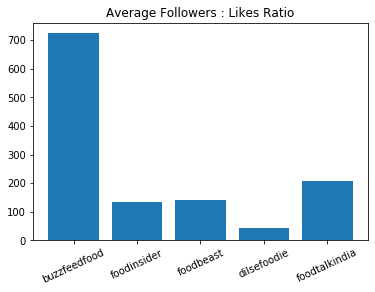

In [91]:
# plotting data.
plt.bar(top_handles,ratio)
plt.xticks(rotation=25)
plt.title('Average Followers : Likes Ratio')
plt.show()